<a href="https://colab.research.google.com/github/prateeshsetty/TASK4/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-5d3356b700cf>:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
<ipython-input-4-5d3356b700cf>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.strip().str.lower()


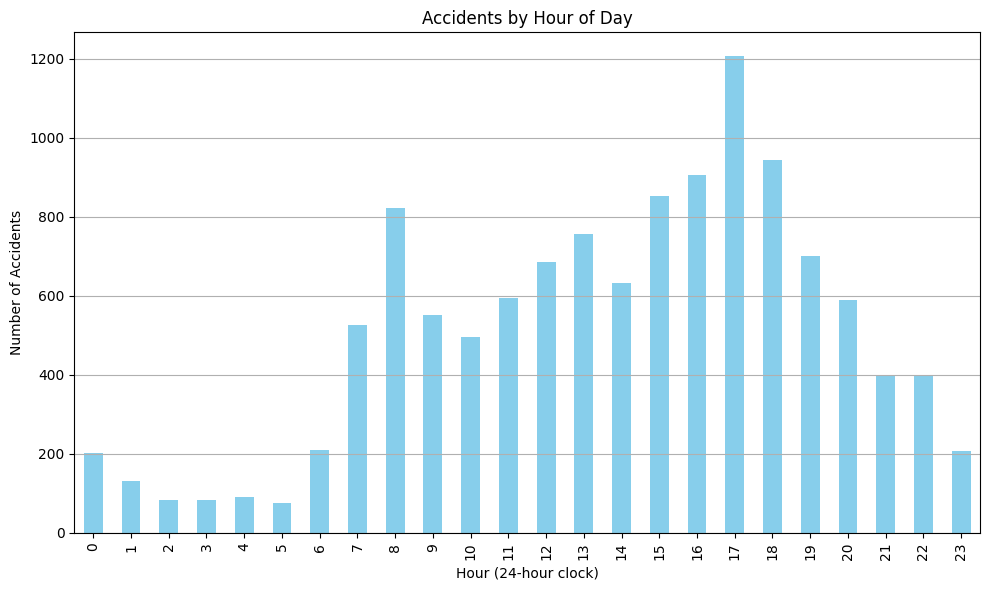

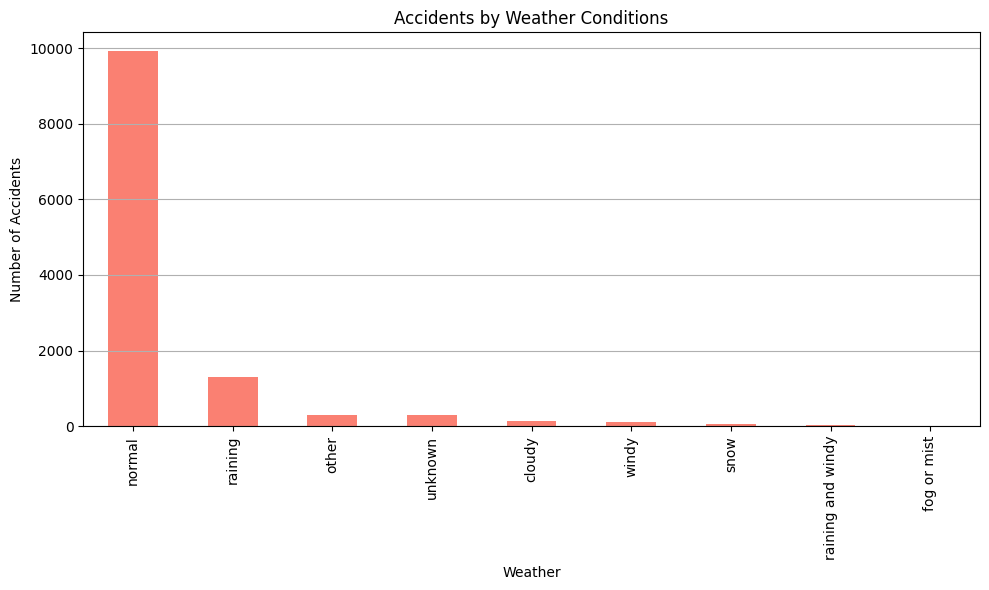

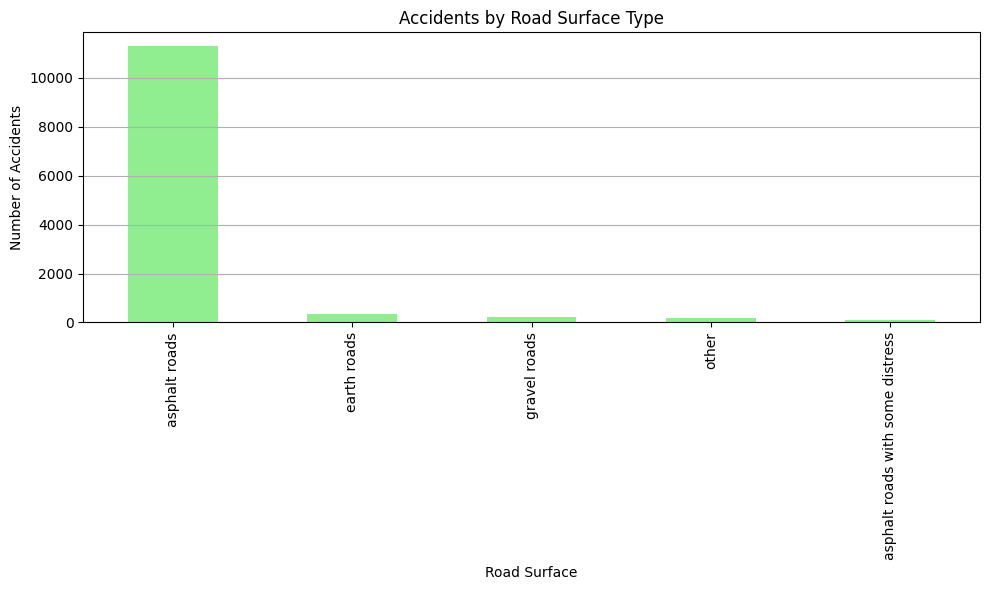

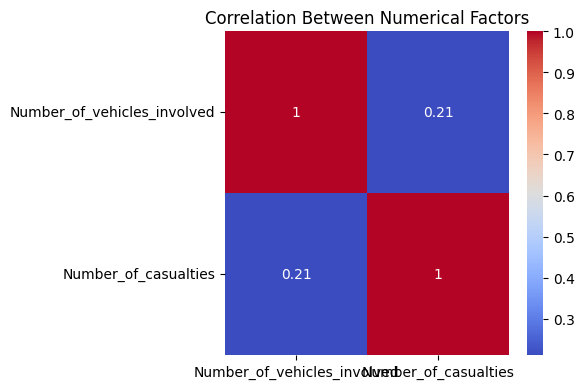

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap

df = pd.read_csv('RTA Dataset.csv')

df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

df = df.dropna(subset=['Time', 'Weather_conditions', 'Road_surface_type', 'Light_conditions'])

for col in ['Weather_conditions', 'Road_surface_type', 'Light_conditions']:
    df[col] = df[col].str.strip().str.lower()

plt.figure(figsize=(10,6))
df['Time'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour (24-hour clock)')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
df['Weather_conditions'].value_counts().plot(kind='bar', color='salmon')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
df['Road_surface_type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Accidents by Road Surface Type')
plt.xlabel('Road Surface')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

np.random.seed(0)
df['Latitude'] = np.random.uniform(8.9, 9.1, size=len(df))
df['Longitude'] = np.random.uniform(38.7, 39.0, size=len(df))

heat_map = folium.Map(location=[9.0, 38.85], zoom_start=12)
heat_data = df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(heat_map)
heat_map.save('accident_heatmap.html')

num_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']
plt.figure(figsize=(6, 4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Factors')
plt.tight_layout()
plt.show()
